# Import Library

In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

# Data Overview

In [20]:
df = pd.read_csv('Telco_CLTV_High_Segment.csv')

In [21]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.200000,6942.0
1,24,68,Jakarta,High End,No,Yes,Yes,Yes,Yes,Yes,Debit,143.000,Yes,106.816666,-6.200000,6544.2
2,25,55,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,125.775,Yes,106.816666,-6.200000,6700.2
3,39,58,Bandung,Mid End,No,Yes,Yes,No,No,Yes,Pulsa,58.890,Yes,107.609810,-6.914744,7077.2
4,41,53,Bandung,High End,No,No,Yes,No,Yes,Yes,Debit,123.305,Yes,107.609810,-6.914744,5626.4


In [22]:
df.shape

(2239, 16)

In [23]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Customer ID,int64,0,0.0,2239,"[4, 24, 25, 39]"
1,Tenure Months,int64,0,0.0,24,"[49, 68, 55, 58]"
2,Location,object,0,0.0,2,"[Jakarta, Bandung]"
3,Device Class,object,0,0.0,3,"[High End, Mid End, Low End]"
4,Games Product,object,0,0.0,3,"[No, Yes, No internet service]"
5,Music Product,object,0,0.0,3,"[Yes, No, No internet service]"
6,Education Product,object,0,0.0,3,"[Yes, No, No internet service]"
7,Call Center,object,0,0.0,2,"[No, Yes]"
8,Video Product,object,0,0.0,3,"[Yes, No, No internet service]"
9,Use MyApp,object,0,0.0,3,"[Yes, No, No internet service]"


In [24]:
df['Tenure Months'].value_counts()

72    362
71    170
70    119
68    100
67     98
69     95
66     89
64     80
56     80
52     80
61     76
60     76
65     76
63     72
62     70
53     70
54     68
50     68
51     68
58     67
49     66
57     65
55     64
59     60
Name: Tenure Months, dtype: int64

The minority class (churned) covers 26% proportion of the dataset, this indicate the mildly imbalanced dataset.

In [25]:
df['Churn Label'].value_counts(normalize=True)*100

No     90.486824
Yes     9.513176
Name: Churn Label, dtype: float64

# Data Cleaning

### Null

In [26]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

### Duplicate

In [27]:
df.duplicated().sum()

0

### Outliers

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
numerical_cols = df.select_dtypes(exclude='object').columns
# exclude ID, Longitude, Latitude
numerical_cols = list(set(numerical_cols)-(set(['Customer ID', 'Longitude', 'Latitude'])))
numerical_cols

['Monthly Purchase (Thou. IDR)', 'Tenure Months', 'CLTV (Predicted Thou. IDR)']

### Double Axis

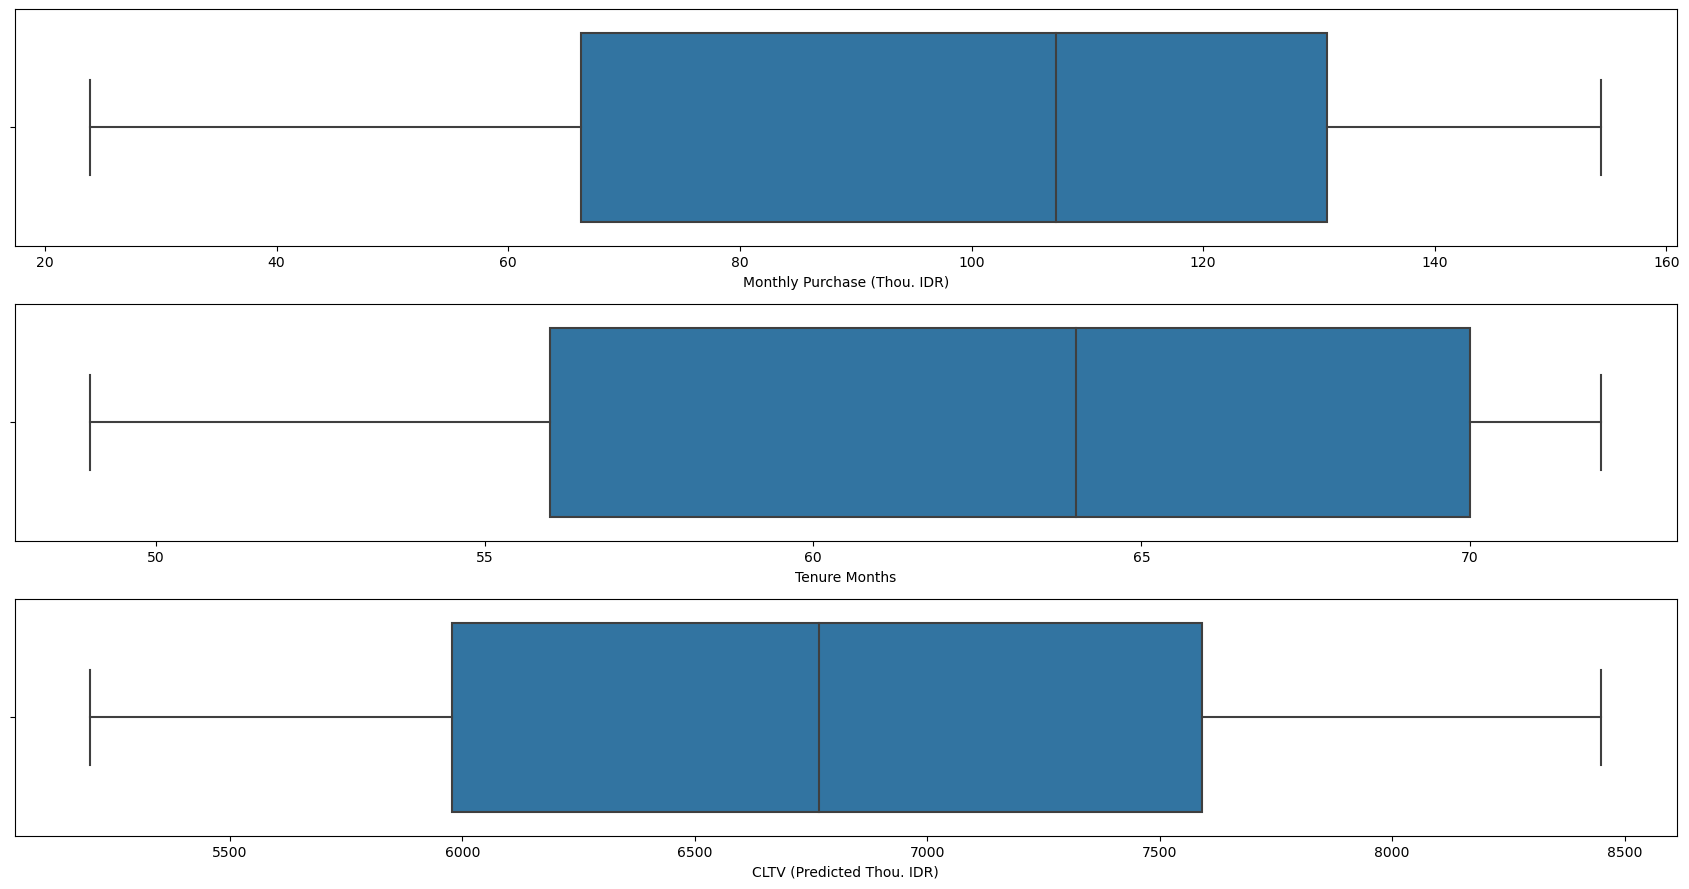

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(17, 9))

for i in range(len(numerical_cols)):
    sns.boxplot(x=df[numerical_cols[i]], ax=axes[i])
    plt.tight_layout()

### Scale Value

In [31]:
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

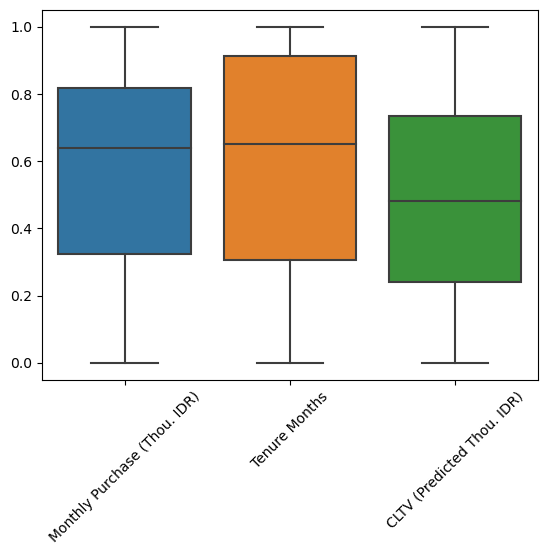

In [32]:
sns.boxplot(df_scaled[numerical_cols], showfliers=True)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45)

# Show the plot
plt.show()

# EDA

## Descriptive Statistics

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,2239.0,4143.054489,1766.292879,4.000000,2797.000000,4217.000000,5638.00000,7042.00000
Tenure Months,2239.0,63.048682,7.478229,49.000000,56.000000,64.000000,70.00000,72.00000
Monthly Purchase (Thou. IDR),2239.0,96.128991,40.920868,23.920000,66.300000,107.250000,130.71500,154.37500
Longitude,2239.0,107.032753,0.353200,106.816666,106.816666,106.816666,107.60981,107.60981
Latitude,2239.0,-6.394727,0.318287,-6.914744,-6.914744,-6.200000,-6.20000,-6.20000
CLTV (Predicted Thou. IDR),2239.0,6789.731041,936.612639,5200.000000,5977.400000,6767.800000,7590.05000,8450.00000


In [34]:
72/12

6.0

In [35]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Location,2239,2,Jakarta,1629
Device Class,2239,3,High End,1014
Games Product,2239,3,Yes,1050
Music Product,2239,3,Yes,1252
Education Product,2239,3,Yes,1221
Call Center,2239,2,No,1186
Video Product,2239,3,Yes,1229
Use MyApp,2239,3,Yes,1250
Payment Method,2239,4,Debit,762
Churn Label,2239,2,No,2026


## Univariate Analysis

### Distribution

#### Numerical Features

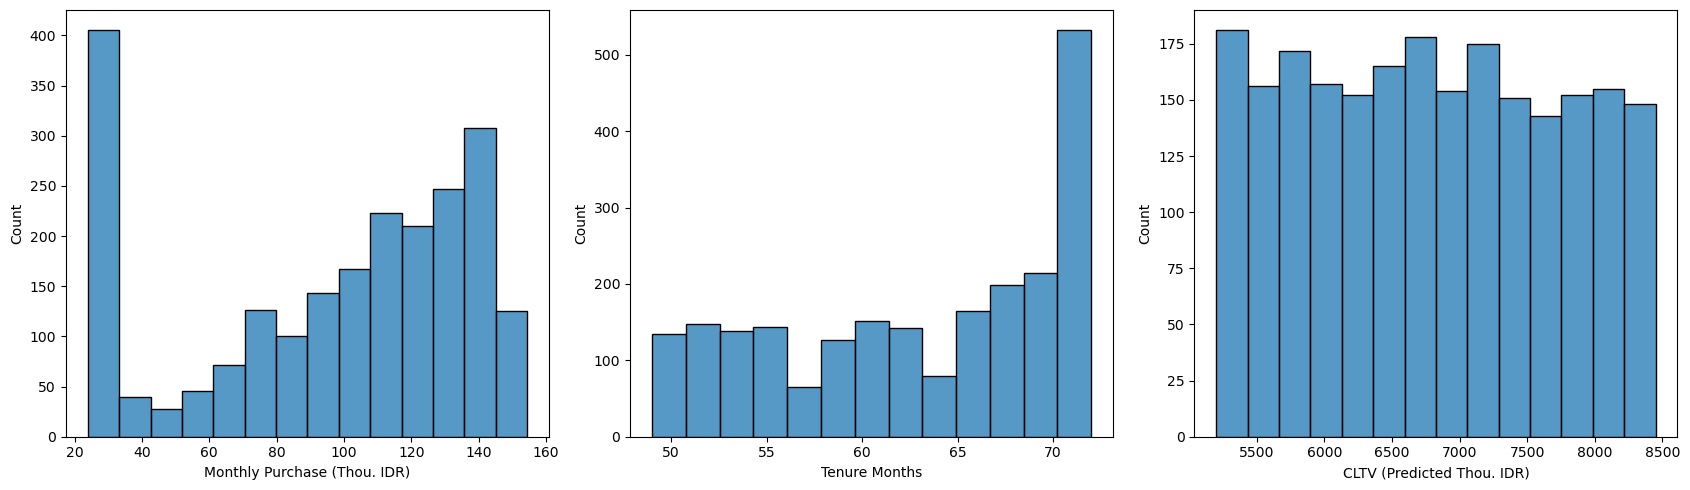

In [36]:
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,5))
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]])
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()
plt.show()

#### Categorical Features

In [37]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Churn Label'],
      dtype='object')

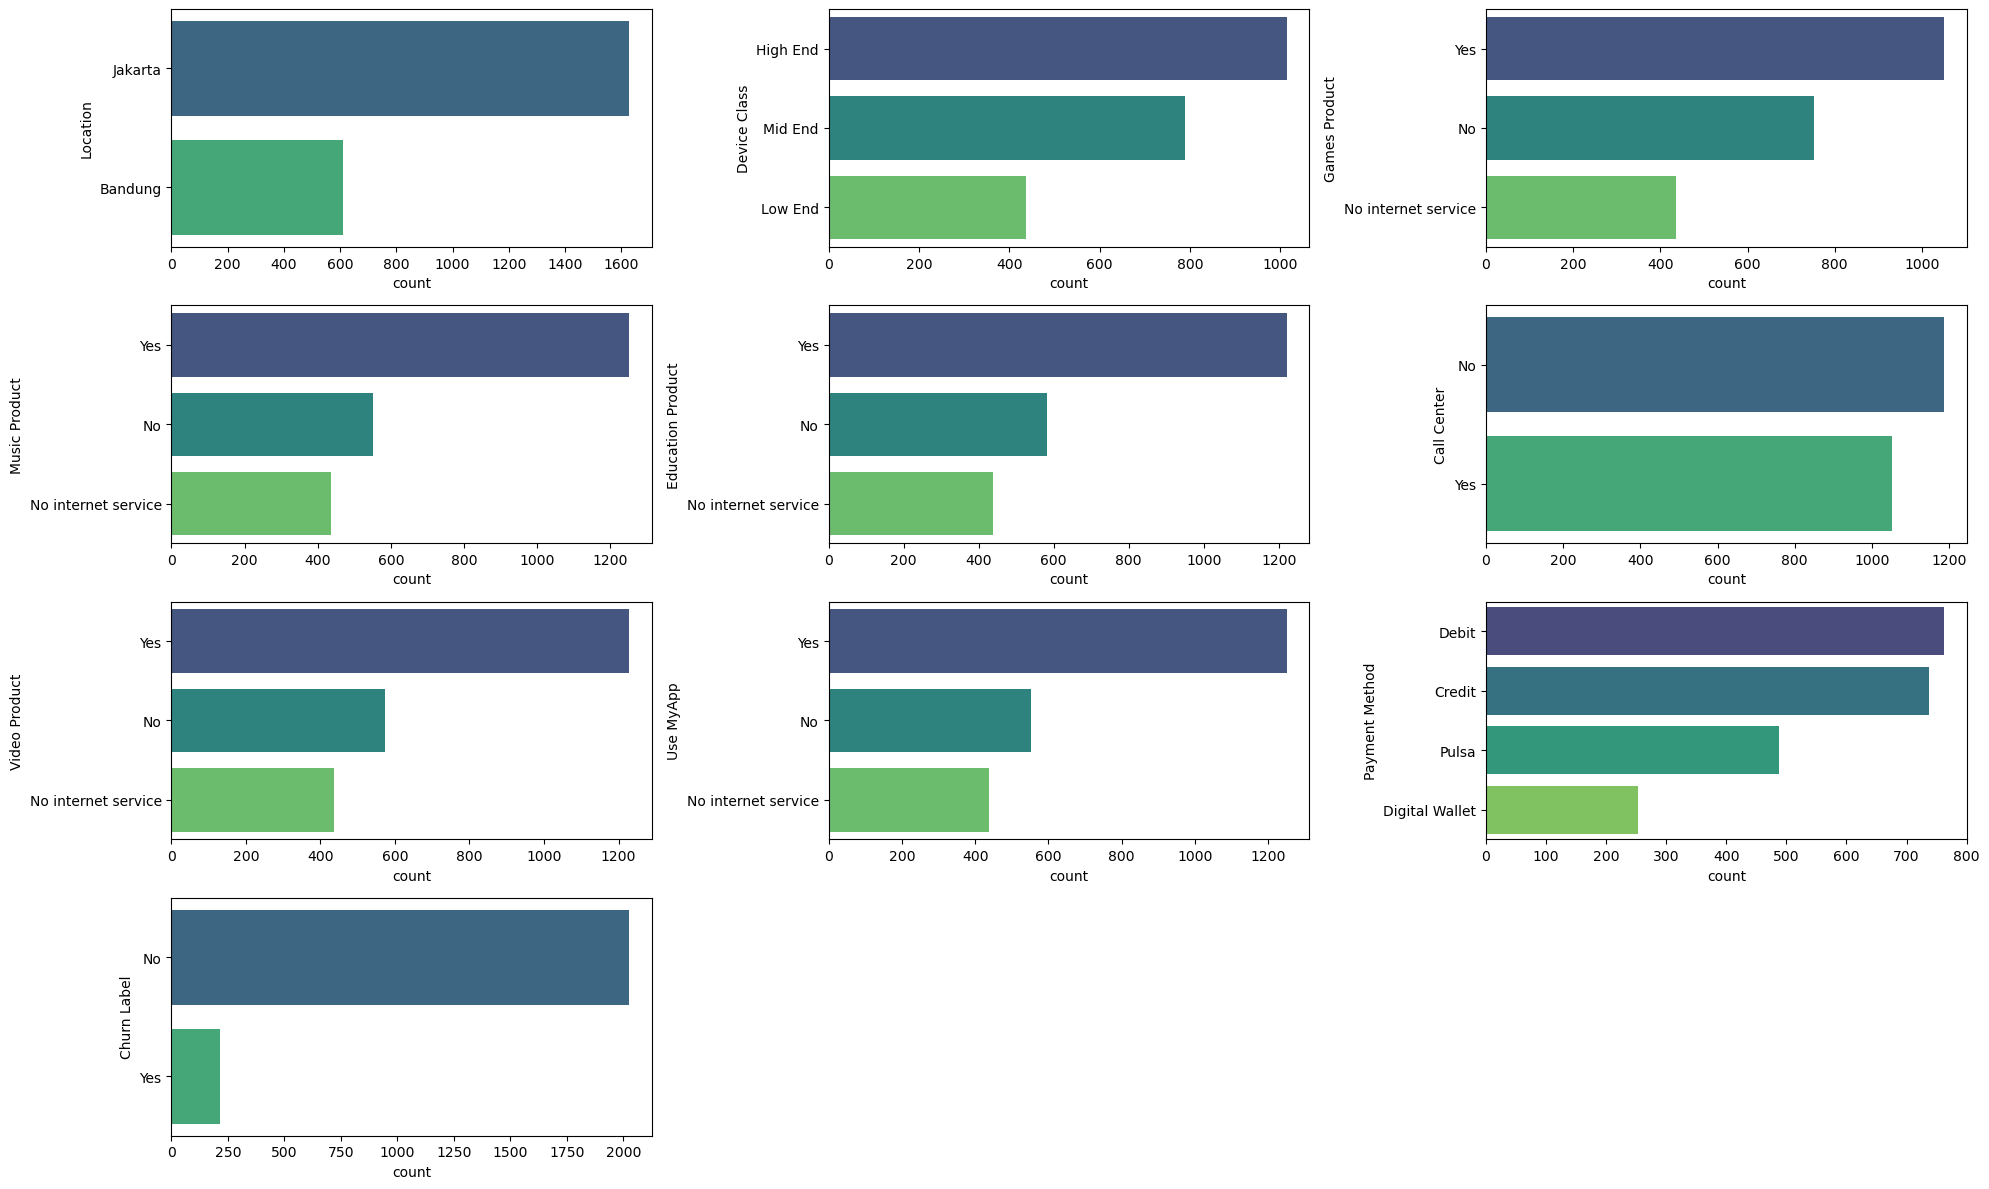

In [38]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

## Bivariate Analysis

#### Numerical Feature

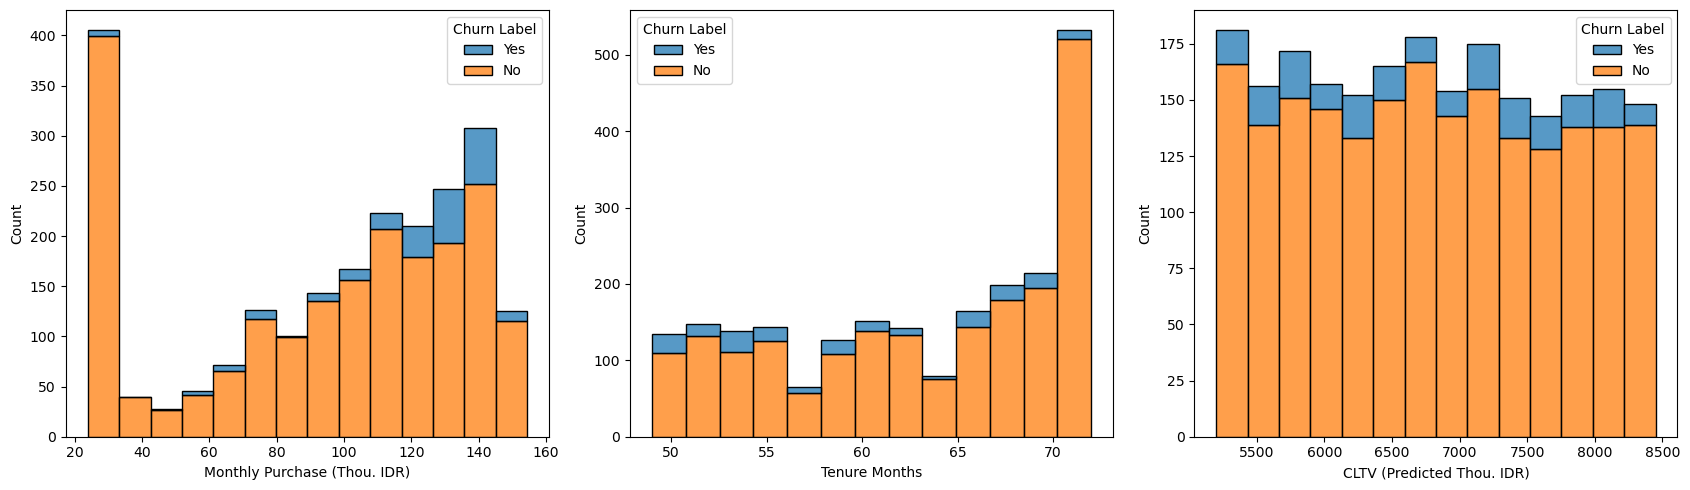

In [57]:
# x_text_coor = [5800, 100, 35]
# y_text_coor = [450, 800, 800]
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,5))
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]], hue=df['Churn Label'], multiple='stack')
    plt.xlabel(numerical_cols[i])
    
    mean=round(df[numerical_cols[i]].mean(), 1)
    #plt.axvline(mean, color='red', linestyle='--') 
    #plt.text(x_text_coor[i], y_text_coor[i], f'mean={mean}', color='red', ha='left', va='top')
    plt.tight_layout()

#### Categorical Features

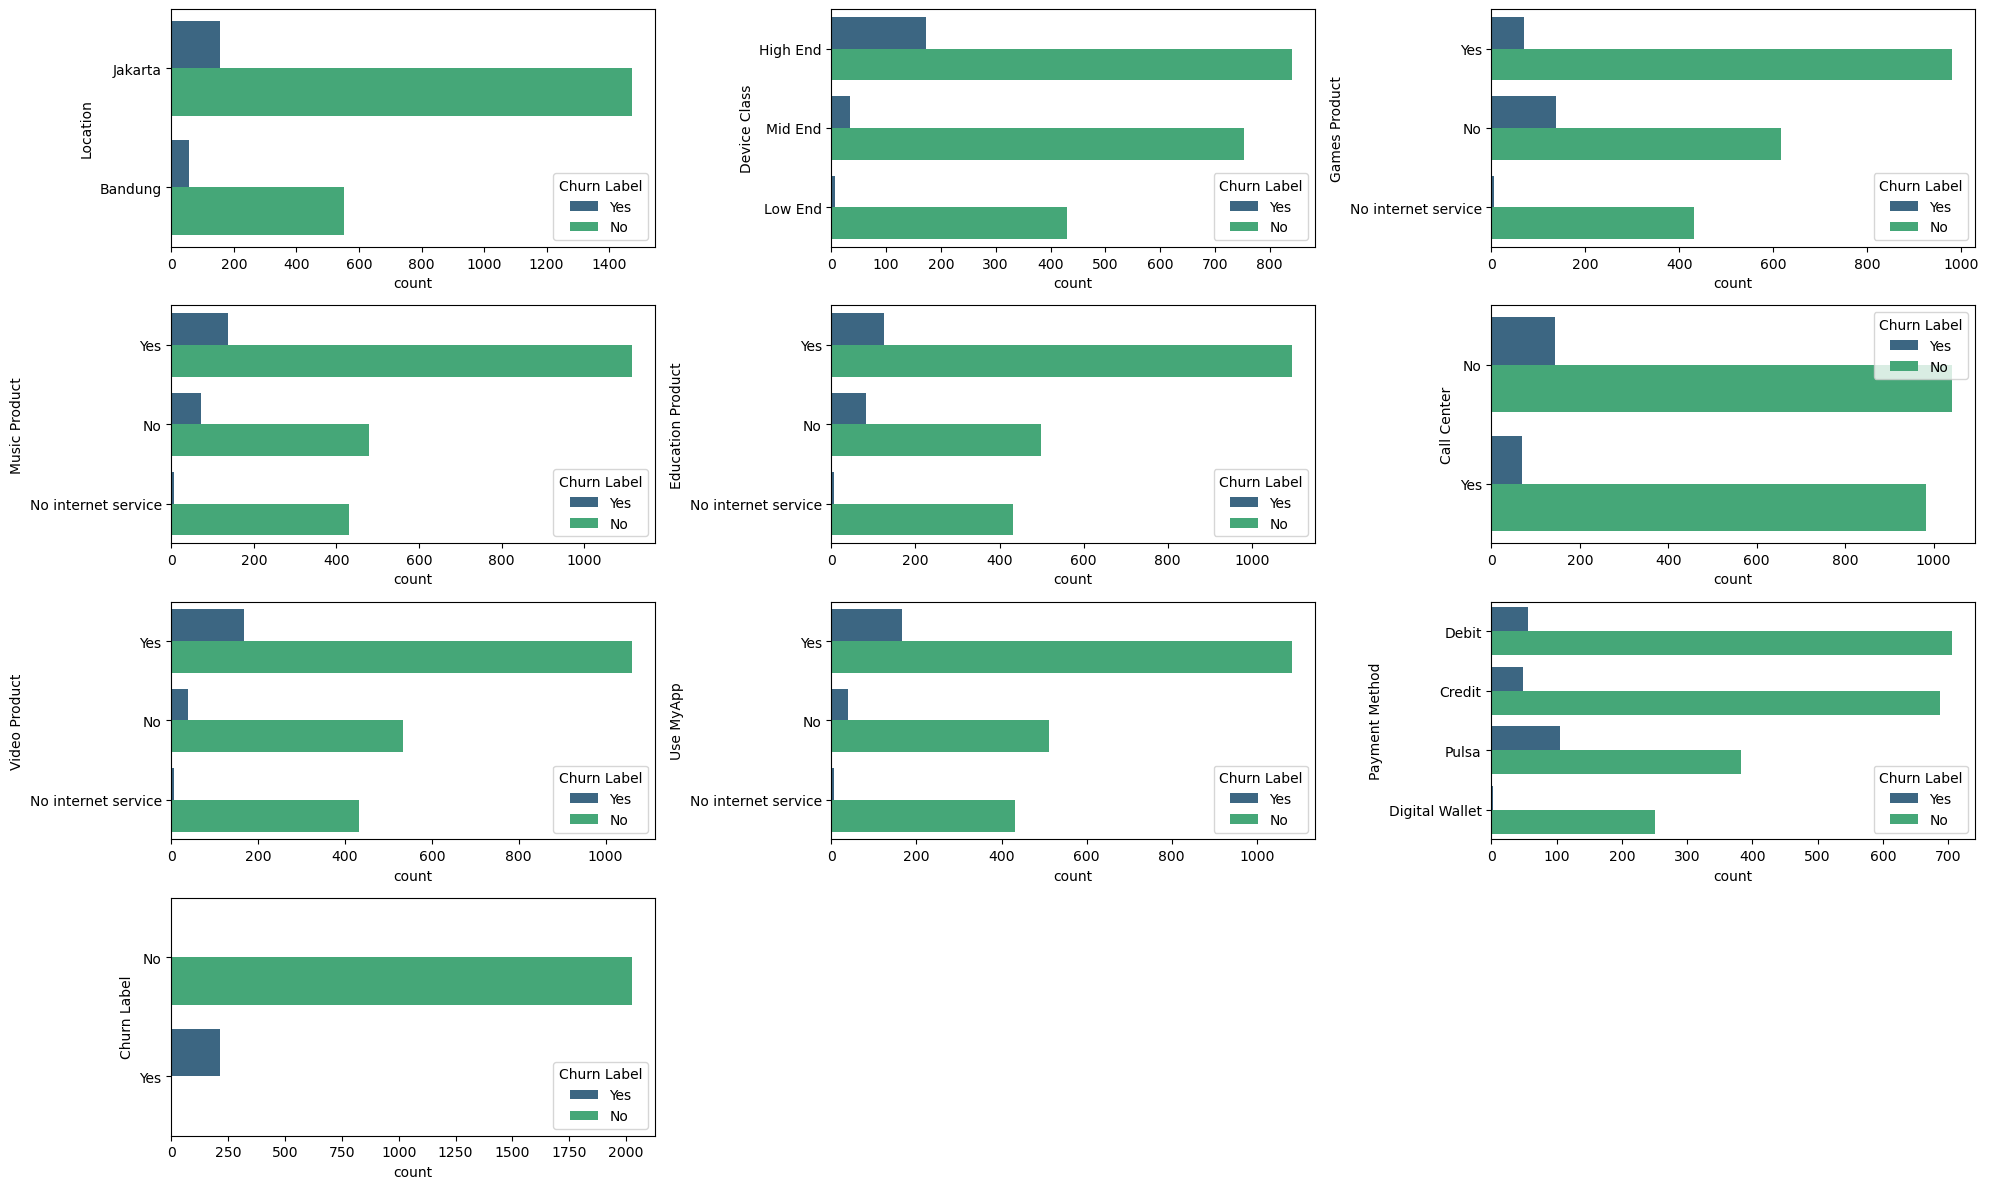

In [40]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]], hue=df['Churn Label'])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]], hue=df['Churn Label'])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

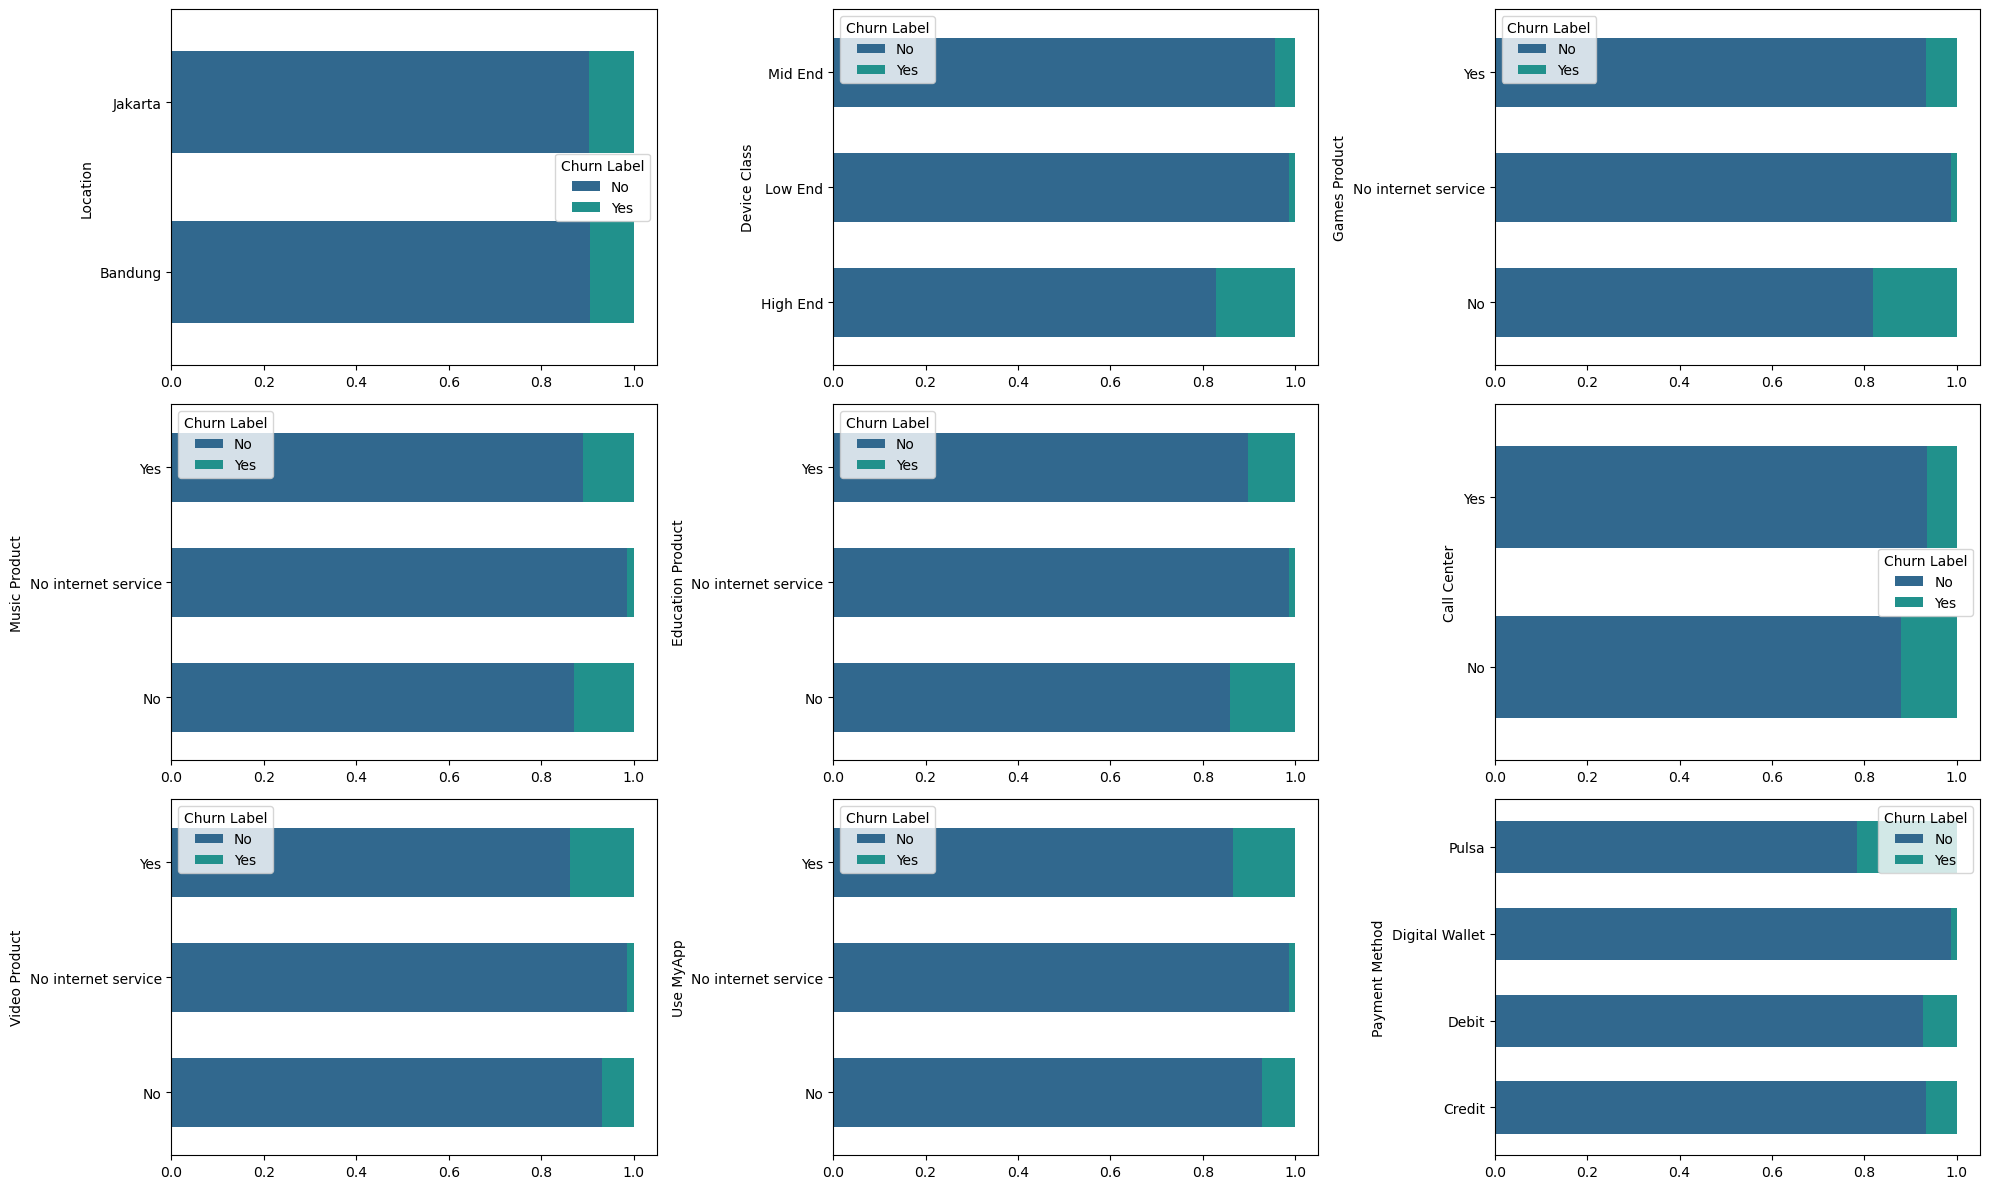

In [41]:
# Create 100% Stacked Bar Chart per Purchase for Each Categorical Feature
fig, ax = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)-1):
    sbc = pd.crosstab(df[cat_cols[i]], df['Churn Label'])
    sbc = sbc.div(sbc.sum(axis=1).astype(float), axis=0)
    sbc.plot(kind='barh', stacked=True, color = ['#31688e', '#21918c'], width = 0.6, ax = ax[xy[i]])
    #ax[xy[i]].legend().remove()

plt.tight_layout()
# not_churn = mlp.patches.Patch(color='#31688e', label='Not Churn')
# churn = mlp.patches.Patch(color='#21918c', label='Churn')
# plt.legend(handles=[not_churn, churn], fontsize=14)

## Multivariate Analysis

#### Correlation Heatmap

<AxesSubplot:>

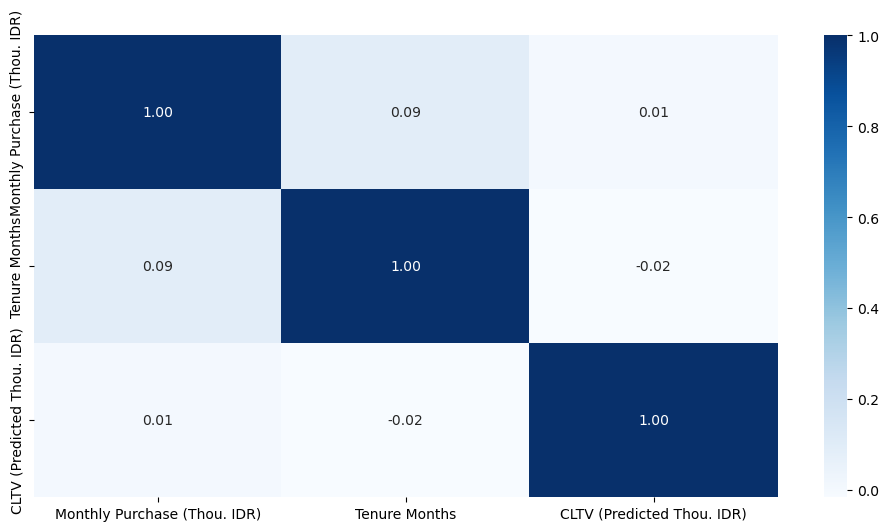

In [42]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), cmap='Blues', annot=True, fmt='.2f')

#### Correlation Heatmap with Target Features

<AxesSubplot:>

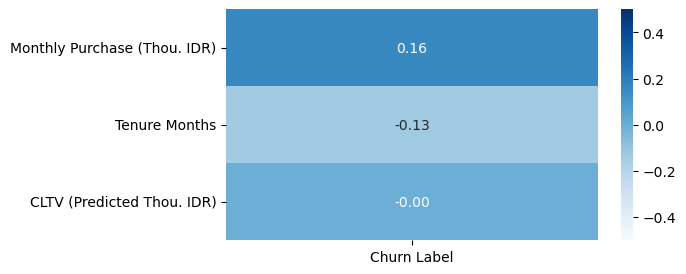

In [43]:
label_num = df['Churn Label'].replace({'Yes': 1, 'No': 0})
data = pd.concat([df[numerical_cols], label_num], axis=1)

plt.figure(figsize=(6, 3))
(sns.heatmap(data.corr(method = 'kendall')
            [data.corr(method='kendall')
             .index != 'Churn Label'][['Churn Label']], 
            annot=True,
           cmap='Blues',
            fmt='.2f',
            vmin=-0.5,
            vmax=0.5))

#### Pair Plot

<Figure size 1500x1500 with 0 Axes>

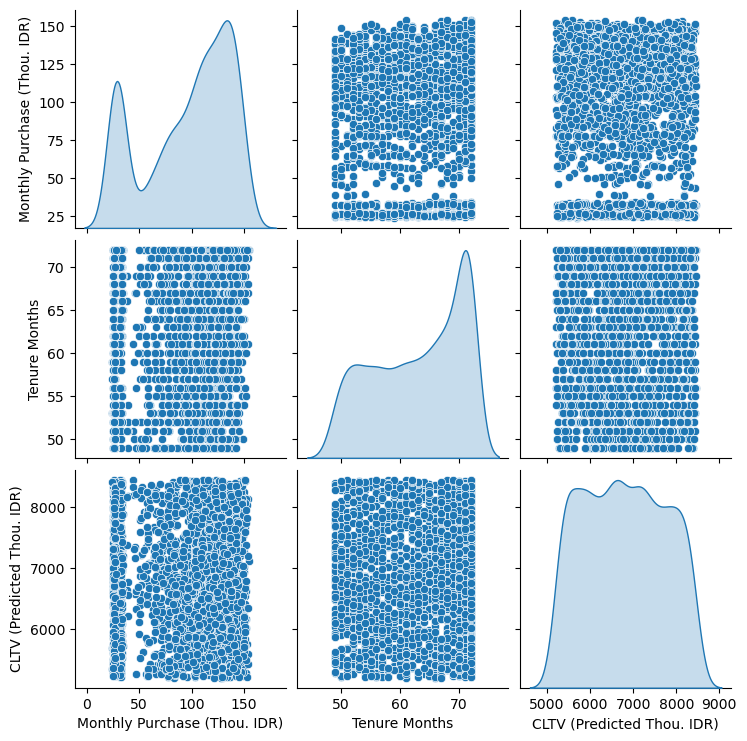

In [44]:
# create pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical_cols], diag_kind='kde')

## Hypothesis Testing

In [45]:
from scipy.stats import chi2_contingency

#### Chi Square Test for Independence of `Device Class` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Device Class` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Device Class` and `Churn Label` variables. In other words, the variables are not independent.

In [46]:
# Create a frequency table
observed_data = pd.crosstab(df['Device Class'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Device Class,,
High End,841,173
Low End,431,6
Mid End,754,34


In [47]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 5.63548950579724e-28 < 0.05 Accept the H0
Expected Frequency:
[[917.53640018  96.46359982]
 [395.42742296  41.57257704]
 [713.03617686  74.96382314]]


This means that the type of device a user uses `Device Class` does not have a significant influence on whether or not they churn `Churn Label`. In simpler terms, it implies that the choice of device (e.g., High End, Mid End, Low End) doesn't play a significant role in determining if a user will churn or not.

#### Chi Square Test for Independence of `Gaming Product` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Games Product` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Games Product` and `Churn Label` variables. In other words, the variables are not independent.

In [48]:
# Create a frequency table
observed_data = pd.crosstab(df['Games Product'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Games Product,,
No,615,137
No internet service,431,6
Yes,980,70


In [49]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 1.4959632451748307e-24 < 0.05 Accept the H0
Expected Frequency:
[[680.46092005  71.53907995]
 [395.42742296  41.57257704]
 [950.11165699  99.88834301]]


#### Chi Square Test for Independence of `Call Center` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Call Center` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Call Center` and `Churn Label` variables. In other words, the variables are not independent.

In [50]:
# Create a frequency table
observed_data = pd.crosstab(df['Call Center'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Call Center,,
No,1042,144
Yes,984,69


In [51]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 9.567795778707358e-06 < 0.05 Accept the H0
Expected Frequency:
[[1073.17373828  112.82626172]
 [ 952.82626172  100.17373828]]


#### Chi Square Test for Independence of `Payment Method` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Payment Method` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Payment Method` and `Churn Label` variables. In other words, the variables are not independent.

In [52]:
# Create a frequency table
observed_data = pd.crosstab(df['Payment Method'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Payment Method,,
Credit,688,49
Debit,706,56
Digital Wallet,250,3
Pulsa,382,105


In [53]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 1.7851523313626284e-24 < 0.05 Accept the H0
Expected Frequency:
[[666.88789638  70.11210362]
 [689.5096025   72.4903975 ]
 [228.93166592  24.06833408]
 [440.67083519  46.32916481]]
